# MNIST


In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


# visualisation

In [3]:
X,Y=mnist['data'],mnist['target']

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
Y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.shape

(70000, 784)

In [7]:
Y.shape

(70000,)

In [8]:
Y=Y.astype('float')

In [9]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
Y[69999]

6.0

# visualisation of x as 6

In [15]:
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def viz(n):
    plt.imshow(X[n].reshape(-28,28))
    

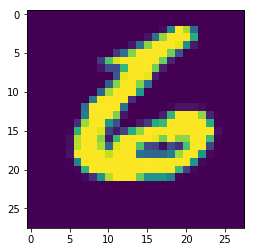

In [17]:
viz(69999)

In [18]:
Y==1

array([False, False, False, ..., False, False, False])

In [19]:
import numpy as np
np.where(Y==1)

(array([    3,     6,     8, ..., 69978, 69984, 69994], dtype=int64),)

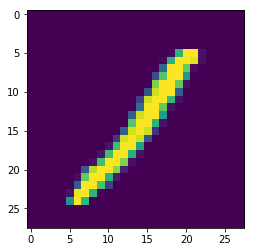

In [20]:
viz(69978)

viz(56432)

In [21]:
Y[56432]

7.0

# SPLITTING MNIST

In [22]:
num_split=60000
X_train,X_test,Y_train,Y_test=X[:num_split],X[num_split:],Y[:num_split],Y[num_split:]

In [23]:
X_train.shape

(60000, 784)

In [24]:
X_test.shape

(10000, 784)

# shuffling

In [25]:
import numpy as np
shuffle_index=np.random.permutation(num_split)
X_train,Y_train=X_train[shuffle_index],Y_train[shuffle_index]

Training binary data

In [26]:
Y_train_0=(Y_train==0)

In [27]:
Y_train_0

array([False, False, False, ..., False, False, False])

In [28]:
Y_train[-2:]

array([5., 8.])

In [29]:
Y_test_0=(Y_train==0)
Y_test_0

array([False, False, False, ..., False, False, False])

In [30]:
Y_test[-2:]

array([5., 6.])

# SGD

In [31]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=0)
sgd.fit(X_train,Y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

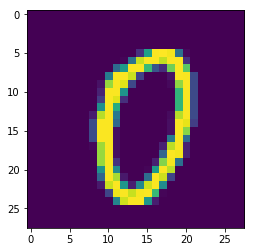

In [32]:
viz(1000)

In [33]:
sgd.predict(X[1000].reshape(1,-1))

array([ True])

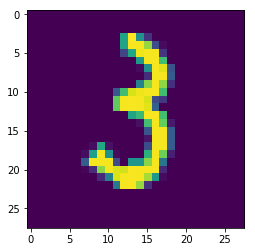

In [34]:
viz(1234)

In [35]:
sgd.predict(X[1234].reshape(1,-1))

array([False])

# Cross_val_score(Accuracy Measures)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
sgd=SGDClassifier(random_state=100)

In [38]:
cross_val_score(sgd,X_train,Y_train_0,cv=3,scoring='accuracy')

array([0.989  , 0.9841 , 0.98625])

# Confusion Matrix

In [39]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(sgd,X_train,Y_train_0,cv=3)

array([False, False, False, ..., False, False, False])

In [40]:
y_train_pred=cross_val_predict(sgd,X_train,Y_train_0,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_0,y_train_pred)

array([[53482,   595],
       [  218,  5705]], dtype=int64)

In [41]:
import pandas as pd
pd.DataFrame(confusion_matrix(Y_train_0,y_train_pred))

,0,1
0,53482,595
1,218,5705


# Precision

measure of acuuracy of + predictions

In [42]:
from sklearn.metrics import precision_score,recall_score
precision_score(Y_train_0,y_train_pred)

0.9055555555555556

In [43]:
5539/(5539+368)

0.9377010326730997

# RECALL

In [44]:
recall_score(Y_train_0,y_train_pred)

0.9631943271990545

In [45]:
5539/(5539+384)

0.9351679891946648

# F! SCORE

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(Y_train_0,y_train_pred)

0.9334860508876708

# recall/precision tradeoff

In [48]:
Y[1000]

0.0

In [49]:
sgd=SGDClassifier(random_state=0)
sgd.fit(X_train,Y_train_0)
y_score=sgd.decision_function(X[1000].reshape(1,-1))
y_score

array([7193.08658233])

In [50]:
Y[1001]

7.0

In [51]:
Y_score=sgd.decision_function(X[1001].reshape(1,-1))

In [52]:
Y_score

array([-45584.31972713])

In [53]:
threshold=0
y_some_digit_pred=(Y_score>threshold)

In [54]:
y_some_digit_pred

array([False])

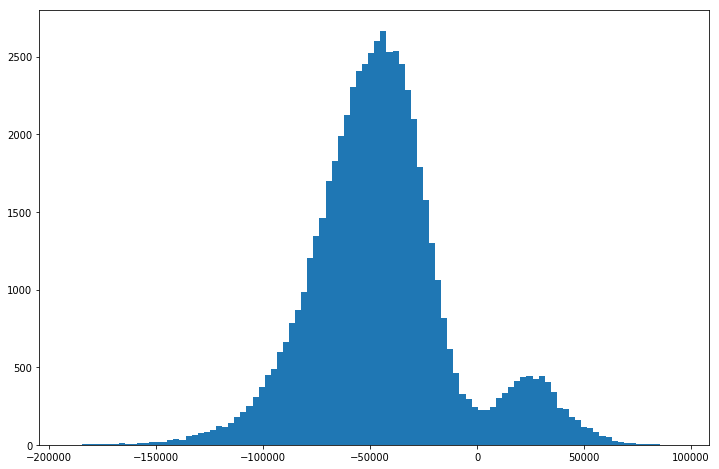

In [57]:
y_scores = cross_val_predict(sgd, X_train, Y_train_0, cv=3, method='decision_function')
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

# PFRECISION RECALL CURVE
# SETTING HIGH PRECISIONS
# SETTING HIGH RECALL

# Receiver operating curve(ROC)